# Preprocessing
In this notebook, we will take generation and weather data of 2 different Solar Power Plants and process it to make it suitable for training our model.

## Objective
- Get rid of missing values
- Merge the datasets
- Estimate the DC_CAPACITY of each power plant to standardize the data
- Create a new column called "UTILIZATION" which is the standardized DC generation data
- Save the data as a single CSV file for convenience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
df1 = pd.read_csv('data/Plant_1_Generation_Data.csv')
df1_weather = pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv')
df2 = pd.read_csv('data/Plant_2_Generation_Data.csv')
df2_weather = pd.read_csv('data/Plant_2_Weather_Sensor_Data.csv')

# Sample(5) of each and summarize
print(df1.sample(5))
print(df1.describe())
print(df1_weather.sample(5))
print(df1_weather.describe())
print(df2.sample(5))
print(df2.describe())
print(df2_weather.sample(5))
print(df2_weather.describe())

              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
33018  31-05-2020 22:45   4135001  sjndEbLyjtCKgGv     0.000    0.0000   
7644   18-05-2020 18:30   4135001  sjndEbLyjtCKgGv     0.000    0.0000   
29858  30-05-2020 10:45   4135001  wCURE6d3bPkepu2  5378.375  527.1875   
15332  23-05-2020 01:45   4135001  ZnxXDlPa8U1GXgE     0.000    0.0000   
8344   19-05-2020 02:30   4135001  iCRJl6heRkivqQ3     0.000    0.0000   

       DAILY_YIELD  TOTAL_YIELD  
33018     5987.000  7142242.000  
7644      5351.000  7042405.000  
29858     1524.375  6897404.375  
15332        0.000  6579139.000  
8344         0.000  7203767.000  
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000 

In [2]:
# countna() and dropna()
print(df1.isna().sum())
print(df1_weather.isna().sum())
print(df2.isna().sum())
print(df2_weather.isna().sum())

# There's no missing values in the data
# df1.dropna(inplace=True)
# df1_weather.dropna(inplace=True)
# df2.dropna(inplace=True)
# df2_weather.dropna(inplace=True)

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [3]:
# Merge the data (drop the DATE_TIME column from the weather data)

# Convert DATE_TIME to datetime
df1["DATE_TIME"] = pd.to_datetime(df1["DATE_TIME"])
df1_weather["DATE_TIME"] = pd.to_datetime(df1_weather["DATE_TIME"])
df2["DATE_TIME"] = pd.to_datetime(df2["DATE_TIME"])
df2_weather["DATE_TIME"] = pd.to_datetime(df2_weather["DATE_TIME"])

df1 = pd.merge(df1.drop(columns= ["PLANT_ID"]), df1_weather.drop(columns = ["PLANT_ID", "SOURCE_KEY"]), on='DATE_TIME')
print(df1.sample(5))

df2 = pd.merge(df2.drop(columns= ["PLANT_ID"]), df2_weather.drop(columns = ["PLANT_ID", "SOURCE_KEY"]), on='DATE_TIME')
print(df2.sample(5))

                DATE_TIME       SOURCE_KEY      DC_POWER     AC_POWER  \
4504  2020-05-17 07:00:00  1BY6WEcLGh8j5v7   1285.714286   125.071429   
57708 2020-06-12 17:45:00  1BY6WEcLGh8j5v7   1396.375000   136.175000   
2349  2020-05-16 06:30:00  1IF53ai7Xc0U56Y    735.500000    71.300000   
22255 2020-05-26 10:45:00  ZoEaEvLYb1n2sOq  11786.142860  1149.957143   
11435 2020-05-20 19:00:00  ih0vzX44oOqAx2f      0.000000     0.000000   

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
4504     46.285714  6271651.286            23.292499           23.832456   
57708  5396.250000  6455634.250            26.462915           28.923132   
2349     17.250000  6190019.250            21.985834           21.195638   
22255  2746.571429  7181660.571            29.967765           59.424286   
11435  8664.000000  6225941.000            26.715222           24.047064   

       IRRADIATION  
4504      0.106996  
57708     0.115929  
2349      0.049515  
22255     0.852111  

C:\Users\karth\AppData\Local\Temp\ipykernel_9144\3573800164.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1["DATE_TIME"] = pd.to_datetime(df1["DATE_TIME"])


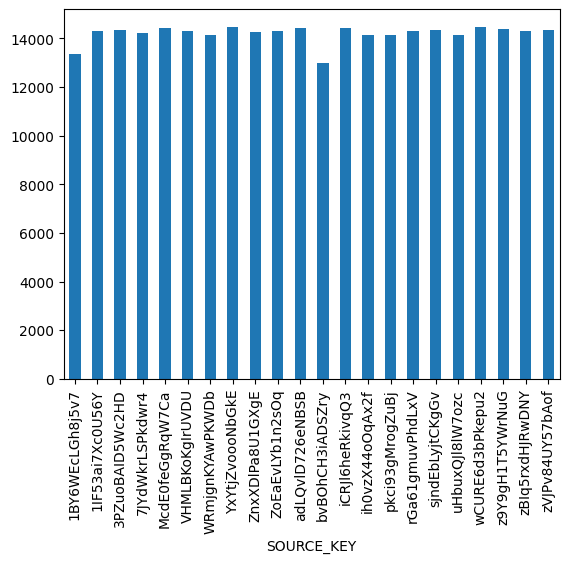

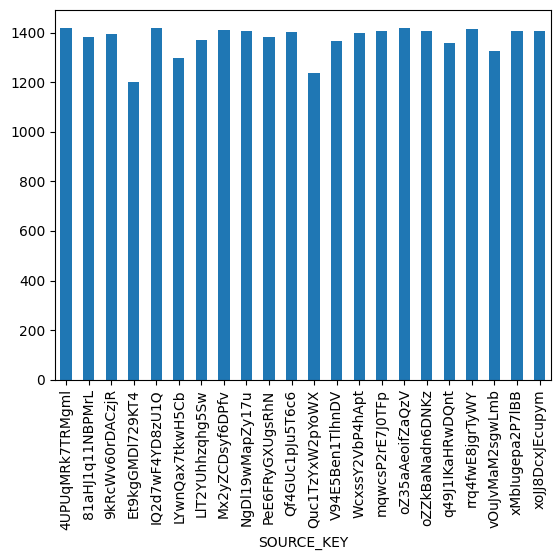

In [4]:
# Now we want to know the Max DC Power grouped by each unique SOURCE_KEY
df1_max_dc = df1.groupby('SOURCE_KEY')['DC_POWER'].max()
df2_max_dc = df2.groupby('SOURCE_KEY')['DC_POWER'].max()
df1_max_dc.plot(kind='bar')
plt.show()
df2_max_dc.plot(kind='bar')
plt.show()

In [5]:
# Standardizing the data by estimating the theoretical DC Capacity of the plant

plant1_peak_dc = df1_max_dc.max()
plant2_peak_dc = df2_max_dc.max()

# Define Derating Factors
temperature_coefficient = 0.97  # 3% loss due to high temperature
system_losses = 0.95            # 5% system losses (wiring, shading, dust, etc.)

total_derating = temperature_coefficient * system_losses

# Estimate the theoretical DC Capacity of the plant
plant1_dc_capacity = plant1_peak_dc / total_derating
plant2_dc_capacity = plant2_peak_dc / total_derating

print(f"Plant 1 DC Capacity: {plant1_dc_capacity}")
print(f"Plant 2 DC Capacity: {plant2_dc_capacity}")

# Standardize the data by dividing by the DC Capacity
df1['UTILIZATION'] = df1['DC_POWER'] / plant1_dc_capacity
df2['UTILIZATION'] = df2['DC_POWER'] / plant2_dc_capacity

# Also create a new column called DC_CAPACITY, it should be an INTEGER
df1['DC_CAPACITY'] = plant1_dc_capacity.astype(int)
df2['DC_CAPACITY'] = plant2_dc_capacity.astype(int)

# Make a single dataframe by taking the superset of both dataframes
df = pd.concat([df1, df2])

print(df.sample(5))

# Save the data
df.to_csv('data/combined_data2.csv', index=False)

Plant 1 DC Capacity: 15703.879544221378
Plant 2 DC Capacity: 1541.9786579851689
                DATE_TIME       SOURCE_KEY      DC_POWER   AC_POWER  \
40507 2020-06-05 03:00:00  81aHJ1q11NBPMrL      0.000000     0.0000   
50237 2020-06-09 17:30:00  Mx2yZCDsyf6DPfv    176.846667   173.3000   
56703 2020-06-12 06:15:00  YxYtjZvoooNbGkE    154.750000    14.9250   
45721 2020-06-07 14:15:00  81aHJ1q11NBPMrL      0.000000     0.0000   
20167 2020-05-25 11:00:00  bvBOhCH3iADSZry  10899.375000  1065.2125   

       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
40507        0.000  1.215410e+09            23.082873           21.872289   
50237     7952.400  2.650061e+06            31.548146           33.424356   
56703        1.500  7.385280e+06            21.112872           20.467969   
45721     1079.000  1.215427e+09            32.816685           50.005705   
20167     2807.125  6.387019e+06            30.382310           59.358415   

       IRRADIATION  UTILIZATIO